**Heart Disease Prediction Model**- We will be using Machine Learning to predict whether any person is suffering from heart disease.

# Import Libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow


%matplotlib inline
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [8]:
df = pd.read_csv('/heart_disease.csv')

In [22]:
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable,Yes
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes


In [9]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [10]:
df.tail()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes
303,38,1,nonanginal,138,175,0,0,173,0,0.0,1,NaN,normal,No


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [13]:
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [14]:
df.nunique()

Age           41
Sex            2
ChestPain      4
RestBP        50
Chol         152
Fbs            2
RestECG        3
MaxHR         91
ExAng          2
Oldpeak       40
Slope          3
Ca             4
Thal           3
AHD            2
dtype: int64

In [16]:
df.dtypes

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD           object
dtype: object

# Dealing with Null values

First we will try and see if there are any null values in the given dataset // if yes then we will proceed further with dealing with the null values and if not then skip to the other section

In [17]:
df.isnull().describe()
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

If yes//
Then we will drop these null values

In [18]:
df = df.dropna()

In [20]:
df.shape

(297, 14)

# Visualization

So fiirst we will try and compare different types of columns and we use bar graph for this.
In a bar graph, we will only be able to incorporate the optional data.
For eg-Sex,Chestpain,Thal,AHD

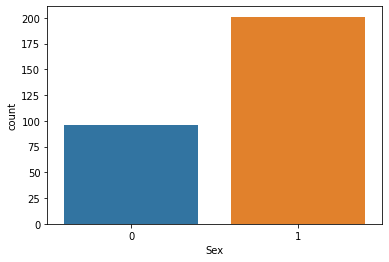

In [24]:
#creating  a bar graph for sex {male,female}
sns.countplot(x="Sex",data=df)

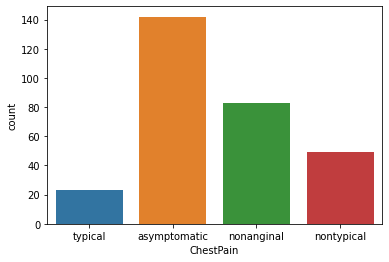

In [25]:
#creating bar graph for chestpain- typical, asymptomatic,nonanginal,nontypical
sns.countplot(x="ChestPain",data=df)

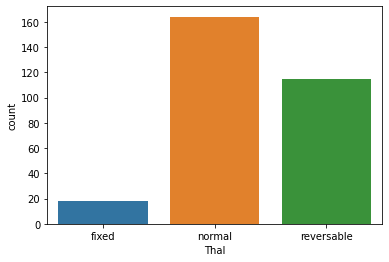

In [26]:
#creating bar graph for THAL-fixed,normal,reversable
sns.countplot(x="Thal",data=df)

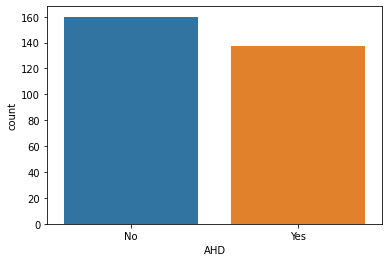

In [27]:
#creating bar graph for AHD-no,yes
sns.countplot(x="AHD",data=df)

Now we will plot a heatmap- To find all features all positively correlated or negatively correlated.

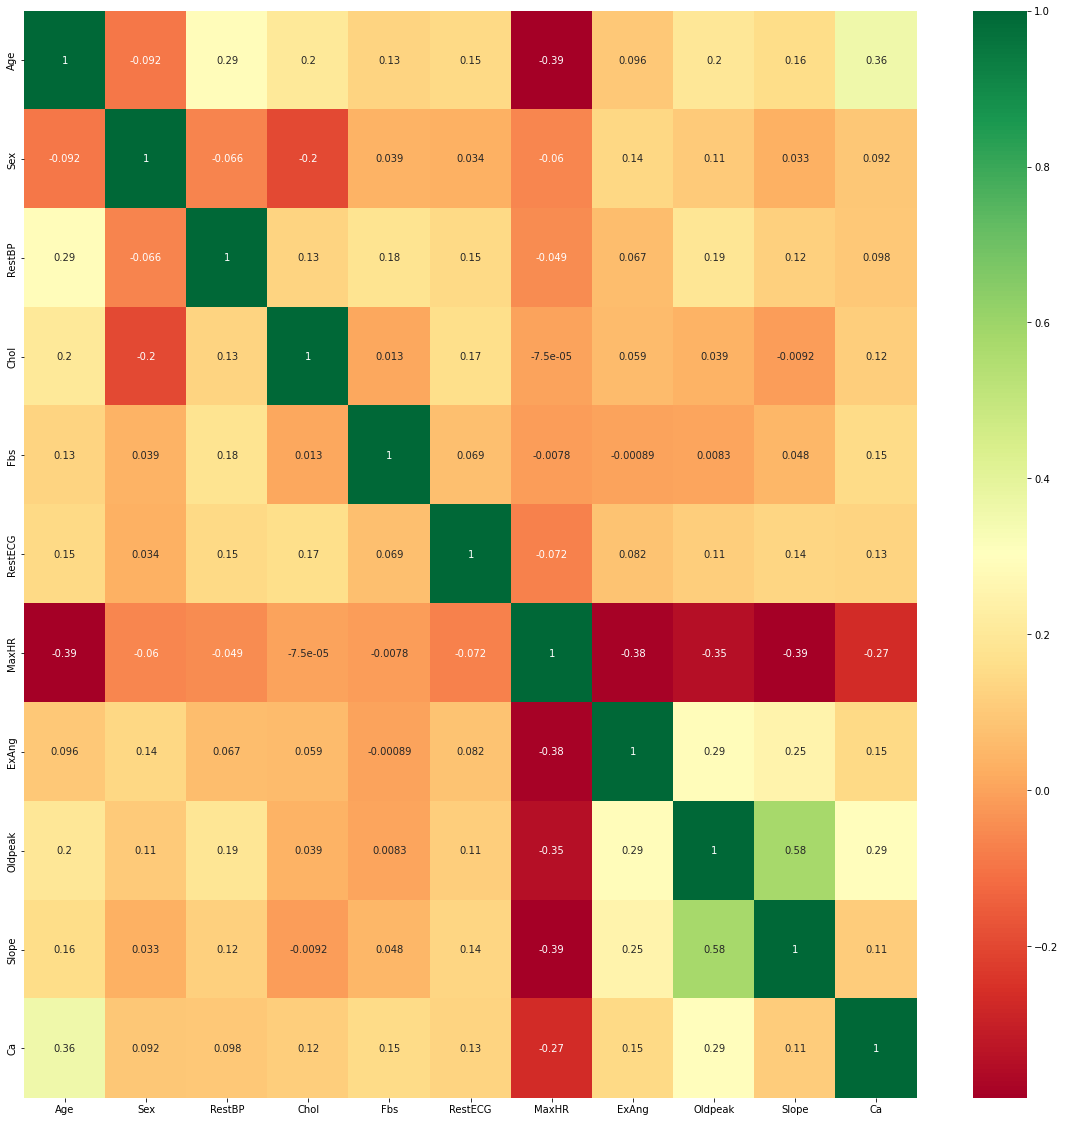

In [28]:
corrmat=df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f283823da50>,
      dtype=object)

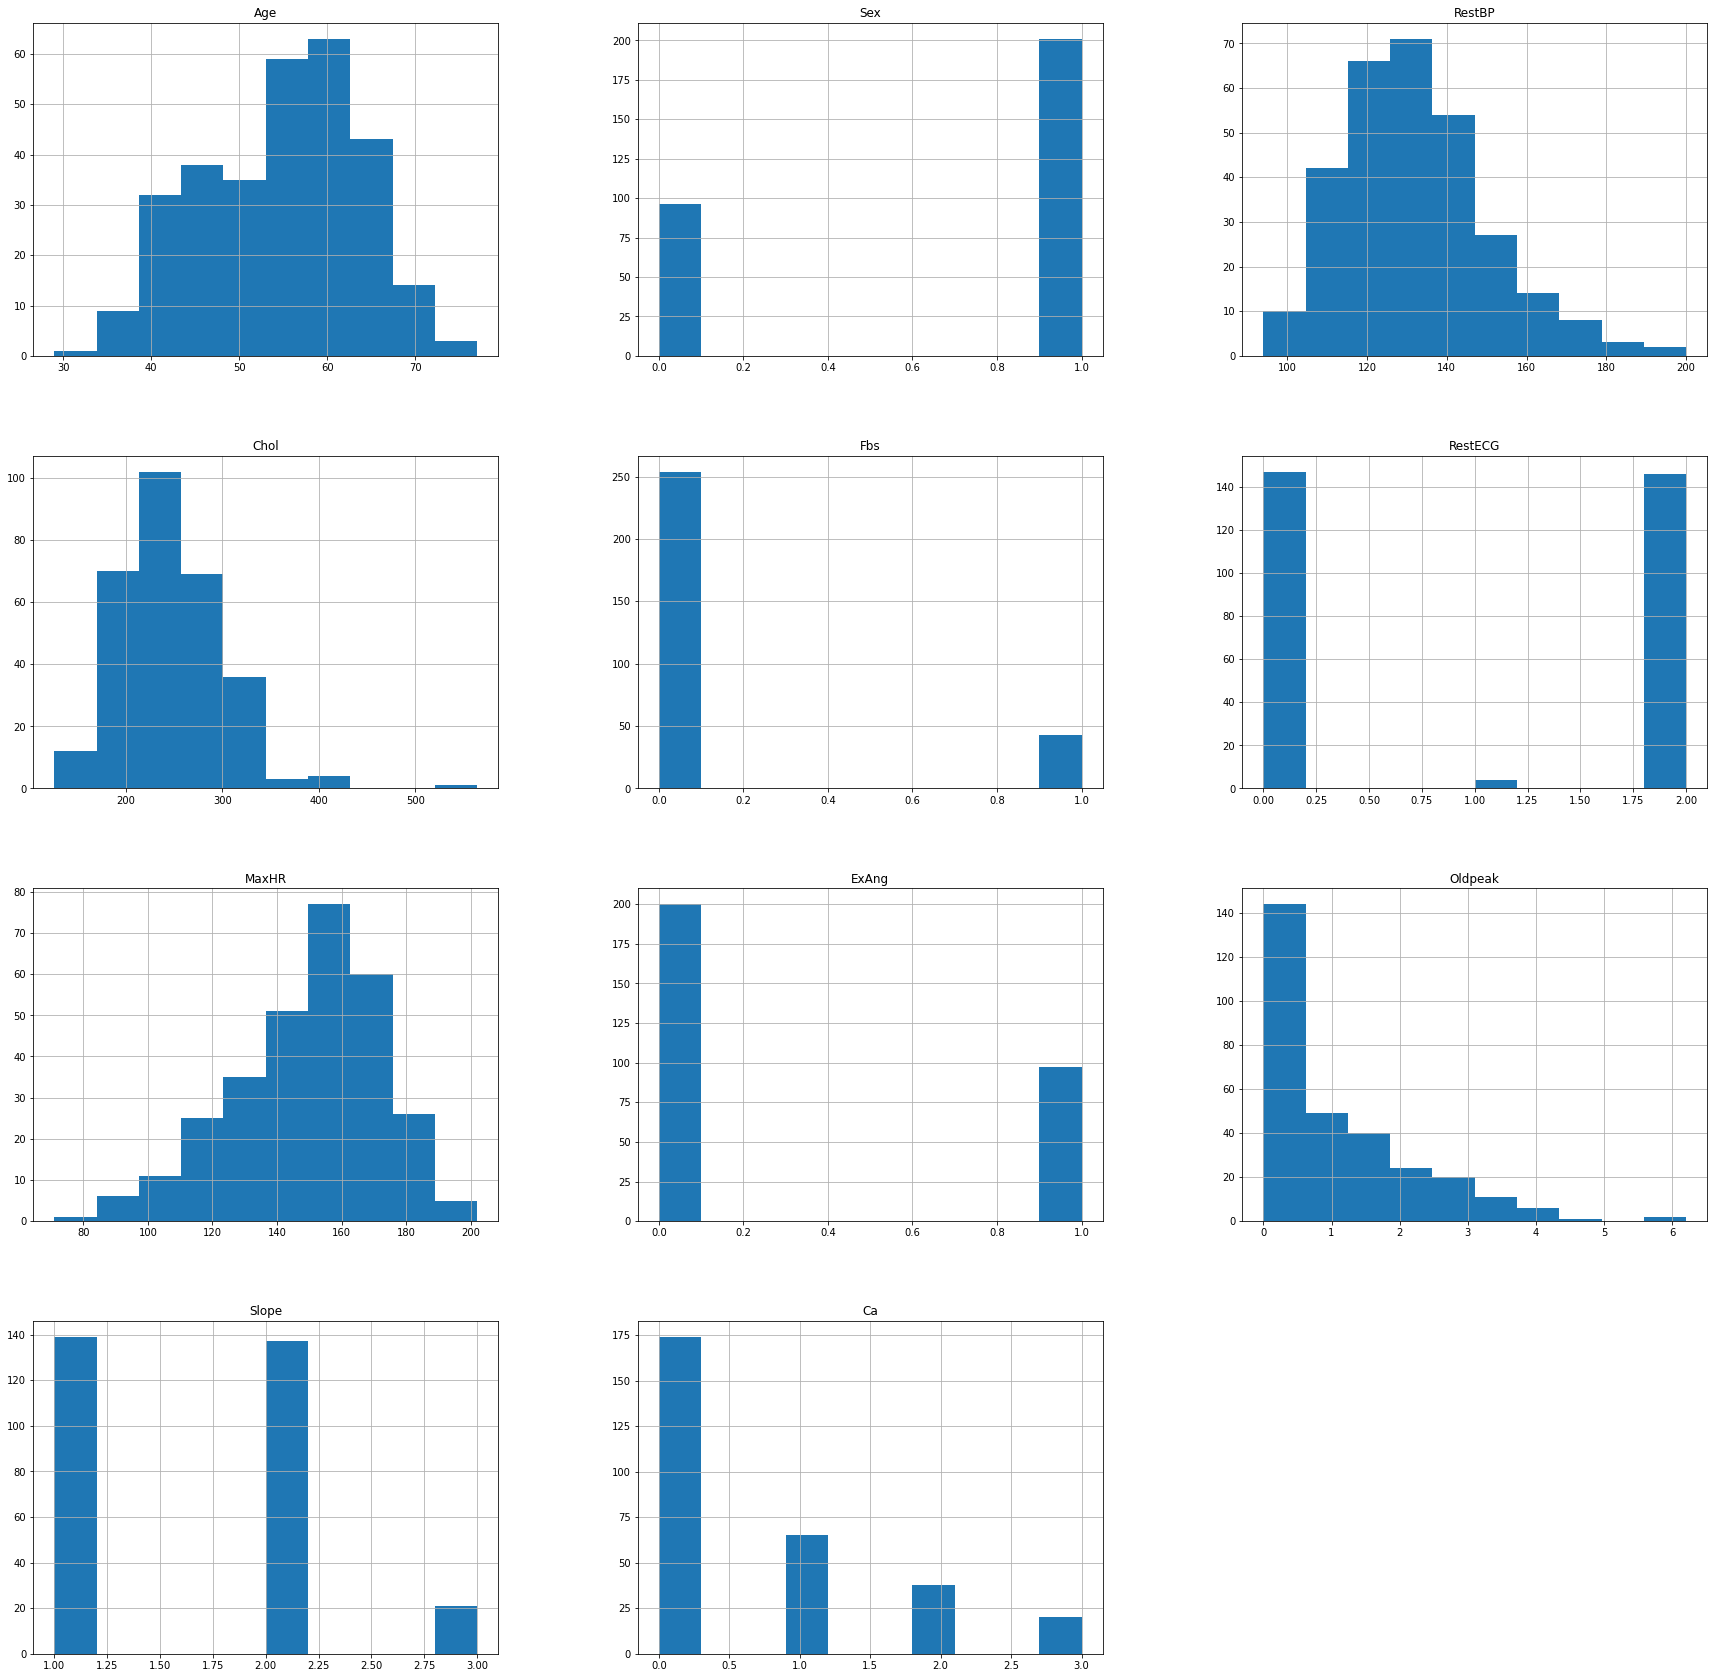

In [30]:
df.hist(figsize=(30,30))

#Label Encoding

As we see that not all the datatype is in numeric form and therefore It'll be difficult to process this data and therefore we convert this into Numeric form.

In [32]:
#convert string values to numeric dtypes
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["ChestPain"] = label_encoder.fit_transform(df["ChestPain"])
df["Thal"] = label_encoder.fit_transform(df["Thal"])
df['AHD'] = label_encoder.fit_transform(df['AHD'])

In [33]:
df.tail()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
298,57,0,0,140,241,0,0,123,1,0.2,2,0.0,2,1
299,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,1
300,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,1
301,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,1
302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,1,1


Now all the values are in numeric dataype

# Splitting Dataset

In [36]:
from sklearn.model_selection import train_test_split
features = df.drop('AHD',axis=1)
target = df['AHD']
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size = 0.8, random_state=45)

In [37]:
x_train

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
77,60,1,0,125,258,0,2,141,1,2.8,2,1.0,2
102,34,1,3,118,182,0,2,174,0,0.0,1,0.0,1
242,41,0,2,126,306,0,0,163,0,0.0,1,0.0,1
153,67,0,1,115,564,0,2,160,0,1.6,2,0.0,2
159,60,1,0,140,293,0,2,170,0,1.2,2,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,48,1,1,124,255,1,0,175,0,0.0,1,2.0,1
217,46,0,2,105,204,0,0,172,0,0.0,1,0.0,1
97,59,1,0,110,239,0,2,142,1,1.2,2,1.0,2
33,64,1,1,140,335,0,0,158,0,0.0,1,0.0,1


In [38]:
y_train

77     1
102    0
242    0
153    0
159    1
      ..
165    0
217    0
97     1
33     1
133    0
Name: AHD, Length: 237, dtype: int64

# Build Model

In [41]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(x_train,y_train)
y_pred = clf.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

#Normalize the data attributes for the Iris dataset.
from sklearn.datasets import load_iris
from sklearn import preprocessing
# load the iris dataset
iris = load_iris()
print(iris.data.shape)
# separate the data from the target attributes
X = iris.data
y = iris.target
# normalize the data attributes
normalized_X = preprocessing.normalize(X)

(150, 4)


In [42]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.9166666666666666
Precision Score : 0.92
Recall Score : 0.8846153846153846
F1 Score : 0.9019607843137256
Confusion Matrix : 
[[32  2]
 [ 3 23]]


In [45]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25,15,100]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'accuracy')
grid_clf_acc.fit(x_train, y_train)

#Predict values based on new parameters
y_pred = grid_clf_acc.predict(x_test)

# Model Evaluation

In [46]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9166666666666666